# Forecasting Best Model(s) 

In [149]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMAResults
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [150]:
zip_results = pd.read_csv('../data/zip_code_notes.csv').set_index('Name')
zip_results

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8


In [151]:
zip_results.sort_values(by=['AIC'])

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6


- Lowest AIC is Aurora  
- Next lowest is Uptown

In [152]:
zip_results.sort_values(by=['RMSE-test set vs. forecast of train set one year'])

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6


- Lowest RMSE is Aurora  
- Next lowest is Metairie, then Uptown  

In [153]:
zip_results.sort_values(by=['Percent RMSE error'])

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6


- Lowest percent RMSE error is Metairie  
- Next Aurora, then Uptown  

# Model Full Data (Aurora) 

In [154]:
# Load dataset
aurora = pd.read_csv('../data/aurora.csv').set_index('Unnamed: 0')
aurora.index.name = None
aurora.index = pd.to_datetime(aurora.index, format='%Y-%m')
aurora.index = pd.DatetimeIndex(aurora.index, freq='MS')
aurora = aurora.rename(columns={'70131': 'Aurora'})

In [155]:
# Fit data to best model
aurora_arima_smx = sm.tsa.statespace.SARIMAX(aurora, 
                                             order=(1,1,1), 
                                             enforce_stationarity=True, 
                                             enforce_invertibility=False)
aurora_output = aurora_arima_smx.fit()

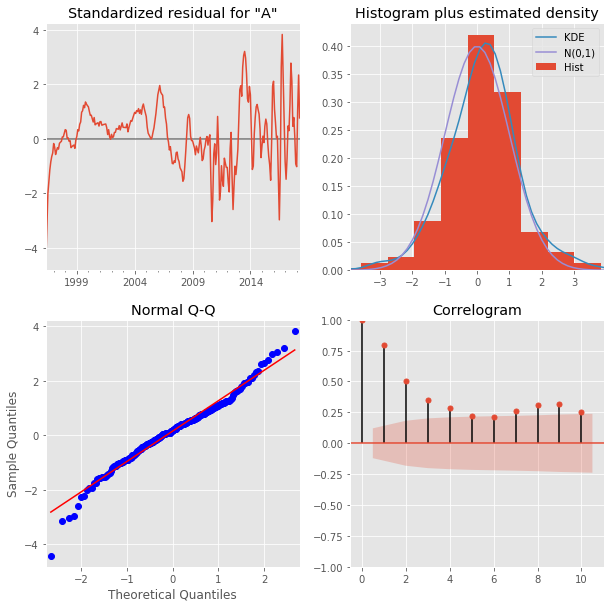

In [156]:
aurora_output.plot_diagnostics(figsize=(10, 10))
plt.show()

In [157]:
aurora.tail(3)

,Aurora
2018-02-01,165000.0
2018-03-01,166900.0
2018-04-01,167800.0


In [158]:
prediction = aurora_output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

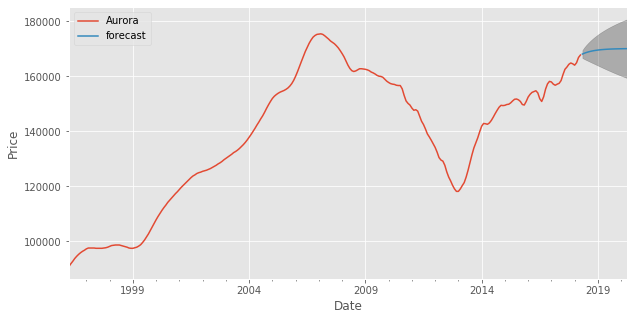

In [159]:
ax = aurora.plot(label='observed', figsize=(10,5))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.show()

## Find numerical forecasts

In [160]:
aurora_output.forecast(24)[-1]

170106.12190599693

In [161]:
aurora_two_yr_forecast = round(aurora_output.forecast(24)[-1], 1)
aurora_two_yr_forecast

170106.1

Aurora two-year ROI

In [162]:
aurora_last_price = aurora.iloc[-1]['Aurora']
aurora_last_price

167800.0

In [163]:
aurora_ROI = (((aurora_two_yr_forecast - aurora_last_price) / aurora_last_price) * 100)
aurora_ROI

1.3743146603098964

In [164]:
aurora_ROI = f"{round(aurora_ROI, 2)}%"
aurora_ROI

'1.37%'

Very poor return on investment. Will look at Uptown.

### Standard Deviation (to Measure Risk)

In [165]:
# Upper limit of confidence interval
upper_limit = pred_conf.iloc[:, 0][-1]
upper_limit

159446.81958835426

In [166]:
# lower limit
lower_limit = pred_conf.iloc[:, 1][-1]
lower_limit

180765.4242236396

In [167]:
arr = np.array([upper_limit, lower_limit])

In [168]:
aurora_std = round(np.std(arr), 2)
aurora_std

10659.3

In [169]:
aurora_months_forecasted = 24

# Model Full Data (uptown) 

In [170]:
# Load dataset
uptown = pd.read_csv('../data/uptown.csv').set_index('Unnamed: 0')
uptown.index.name = None
uptown.index = pd.to_datetime(uptown.index, format='%Y-%m')
uptown.index = pd.DatetimeIndex(uptown.index, freq='MS')
uptown = uptown.rename(columns={'70115': 'Uptown'})

In [171]:
uptown_arima_smx = sm.tsa.statespace.SARIMAX(uptown,
                                        order=(0,2,0), 
                                        enforce_stationarity=True, 
                                        enforce_invertibility=False)
uptown_output = uptown_arima_smx.fit()

In [172]:
prediction = uptown_output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

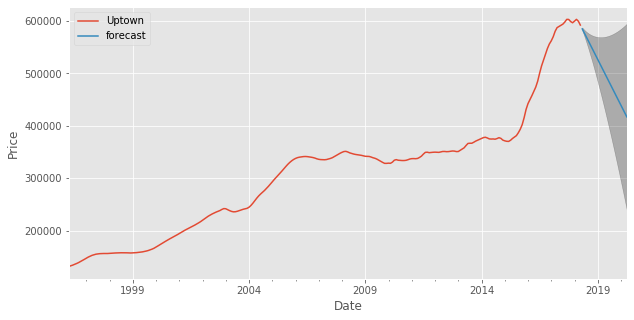

In [173]:
ax = uptown.plot(label='observed', figsize=(10,5))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.show()

In [174]:
# Try 12 steps instead

prediction = uptown_output.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

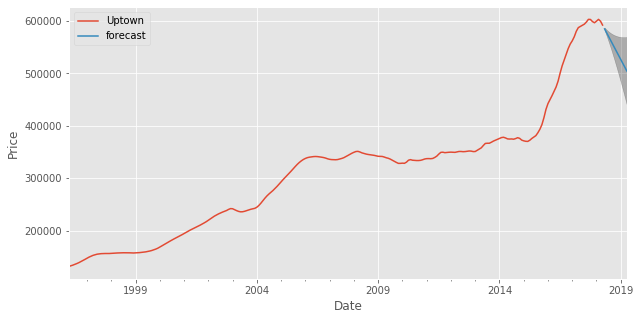

In [175]:
ax = uptown.plot(label='observed', figsize=(10,5))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.show()

## Find numerical forecasts

In [176]:
uptown_output.forecast(12)[-1]

504700.0

In [177]:
uptown_one_yr_forecast = round(uptown_output.forecast(12)[-1], 1)
uptown_one_yr_forecast

504700.0

uptown one-year ROI

In [178]:
uptown_last_price = uptown.iloc[-1]['Uptown']
uptown_last_price

592300.0

In [179]:
uptown_ROI = (((uptown_one_yr_forecast - uptown_last_price) / uptown_last_price) * 100)
uptown_ROI

-14.789802464967078

In [180]:
uptown_ROI = f"{round(uptown_ROI, 3)}%"
uptown_ROI

'-14.79%'

This investment will lose money

### Standard Deviation (to Measure Risk)

In [181]:
# Upper limit of confidence interval
upper_limit = pred_conf.iloc[:, 0][-1]
upper_limit

439938.70745543117

In [182]:
# lower limit
lower_limit = pred_conf.iloc[:, 1][-1]
lower_limit

569461.2925445689

In [183]:
arr = np.array([upper_limit, lower_limit])

In [184]:
uptown_std = round(np.std(arr), 2)
uptown_std

64761.29

In [185]:
uptown_months_forecasted = 12

# Model Full Data (Metairie)

In [186]:
# Load dataset
metairie = pd.read_csv('../data/metairie.csv').set_index('Unnamed: 0')
metairie.index.name = None
metairie.index = pd.to_datetime(metairie.index, format='%Y-%m')
metairie.index = pd.DatetimeIndex(metairie.index, freq='MS')
metairie = metairie.rename(columns={'70005': 'metairie'})

In [187]:
# Fit data to best model
metairie_arima_smx = sm.tsa.statespace.SARIMAX(metairie, 
                                             order=(1,1,1), 
                                             enforce_stationarity=True, 
                                             enforce_invertibility=False)
metairie_output = metairie_arima_smx.fit()

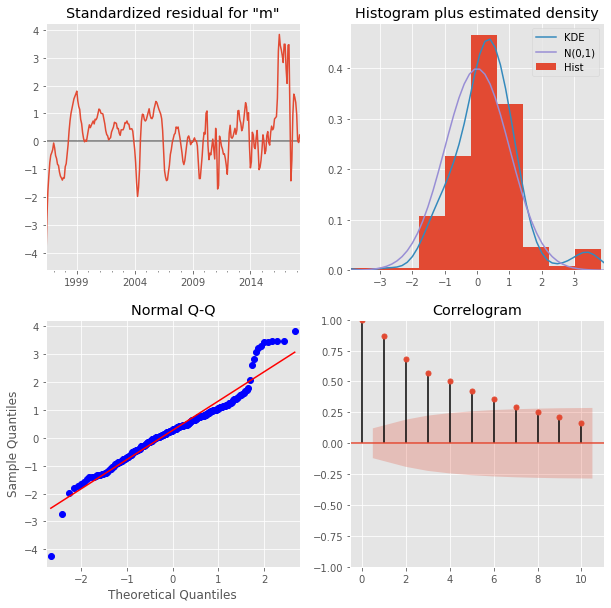

In [188]:
metairie_output.plot_diagnostics(figsize=(10, 10))
plt.show()

In [189]:
metairie.tail(3)

,metairie
2018-02-01,290200.0
2018-03-01,290800.0
2018-04-01,291600.0


In [190]:
prediction = metairie_output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

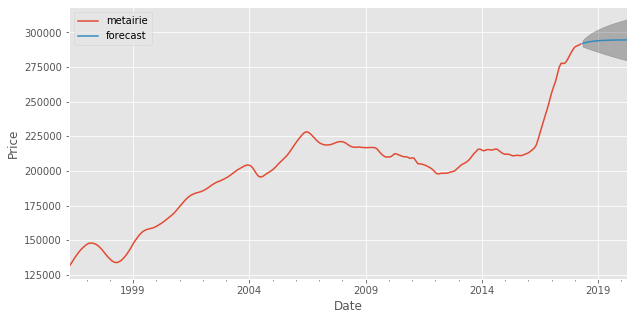

In [191]:
ax = metairie.plot(label='observed', figsize=(10,5))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.show()

## Find numerical forecasts

In [192]:
metairie_output.forecast(24)[-1]

294615.40666841564

In [193]:
metairie_two_yr_forecast = round(metairie_output.forecast(24)[-1], 1)
metairie_two_yr_forecast

294615.4

metairie two-year ROI

In [194]:
metairie_last_price = metairie.iloc[-1]['metairie']
metairie_last_price

291600.0

In [195]:
metairie_ROI = (((metairie_two_yr_forecast - metairie_last_price) / metairie_last_price) * 100)
metairie_ROI

1.034087791495207

In [196]:
metairie_ROI = f"{round(metairie_ROI, 2)}%"
metairie_ROI

'1.03%'

Very poor return on investment.

### Standard Deviation (to Measure Risk)

In [197]:
# Upper limit of confidence interval
upper_limit = pred_conf.iloc[:, 0][-1]
upper_limit

279772.9242742282

In [198]:
# lower limit
lower_limit = pred_conf.iloc[:, 1][-1]
lower_limit

309457.88906260306

In [199]:
arr = np.array([upper_limit, lower_limit])

In [200]:
metairie_std = round(np.std(arr), 2)
metairie_std

14842.48

In [201]:
metairie_months_forecasted = 24

# Create Dataframe for Comparison

In [225]:
data ={'Area': ['Aurora', 'Uptown', 'Metairie'],
       'Latest Price': ["${:,.0f}".format(aurora_last_price), "${:,.0f}".format(uptown_last_price), "${:,.0f}".format(metairie_last_price)],
       'Months Forecasted': [aurora_months_forecasted, uptown_months_forecasted, metairie_months_forecasted],
       'Predicted ROI': [aurora_ROI, uptown_ROI, metairie_ROI],
       'STD (Risk)': [aurora_std, uptown_std, metairie_std]
      }

In [226]:
compare_df = pd.DataFrame(data).set_index('Area')
compare_df.index.name = None
compare_df

,Latest Price,Months Forecasted,Predicted ROI,STD (Risk)
Aurora,"$167,800",24,1.37%,10659.30
Uptown,"$592,300",12,-14.79%,64761.29
Metairie,"$291,600",24,1.03%,14842.48
